In [120]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [87]:
#Usaremos el CSV "AllDecks" tras la modificaciones realizadas previamente
df = pd.read_csv('../CSV/AllDecks.csv')
df.head()

,code,mainBoard,meta,name,releaseDate,sideBoard,type,total_price,deck_color
0,KTK,"[{'artist': 'Zack Stella', 'borderColor': 'bla...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Abzan Siege,2014-09-26,[],Intro Pack,0.68,"['B', 'W', 'G']"
1,C18,"[{'artist': 'Winona Nelson', 'borderColor': 'b...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Adaptive Enchantment,2018-08-10,"[{'artist': 'Johannes Voss', 'borderColor': 'b...",Commander Deck,0.00,"['W', 'U', 'G']"
2,BTD,"[{'artist': 'Doug Chaffee', 'borderColor': 'wh...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Aerodoom,2000-10-01,[],Theme Deck,0.00,"['B', 'U']"
3,WTH,"[{'artist': 'Douglas Shuler', 'borderColor': '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Forces,2007-12-12,[],MTGO Theme Deck,2.63,"['U', 'W']"
4,JUD,"[{'artist': 'Ron Spears', 'borderColor': 'blac...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Razers,2002-05-27,[],Theme Deck,0.68,"['R', 'U']"


In [89]:
#Crearemos las variables dummies para los colores de los mazos
mlb = MultiLabelBinarizer()
df_colors = pd.DataFrame(mlb.fit_transform(df['deck_color']), columns=mlb.classes_, index=df.index)
color_columns = [col for col in df_colors.columns if re.match(r'^[A-Z]$', col)]
df_colors = df_colors[color_columns]

In [91]:
df = df.join(df_colors)
df.head()

,code,mainBoard,meta,name,releaseDate,sideBoard,type,total_price,deck_color,B,G,R,U,W
0,KTK,"[{'artist': 'Zack Stella', 'borderColor': 'bla...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Abzan Siege,2014-09-26,[],Intro Pack,0.68,"['B', 'W', 'G']",1,1,0,0,1
1,C18,"[{'artist': 'Winona Nelson', 'borderColor': 'b...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Adaptive Enchantment,2018-08-10,"[{'artist': 'Johannes Voss', 'borderColor': 'b...",Commander Deck,0.00,"['W', 'U', 'G']",0,1,0,1,1
2,BTD,"[{'artist': 'Doug Chaffee', 'borderColor': 'wh...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Aerodoom,2000-10-01,[],Theme Deck,0.00,"['B', 'U']",1,0,0,1,0
3,WTH,"[{'artist': 'Douglas Shuler', 'borderColor': '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Forces,2007-12-12,[],MTGO Theme Deck,2.63,"['U', 'W']",0,0,0,1,1
4,JUD,"[{'artist': 'Ron Spears', 'borderColor': 'blac...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Razers,2002-05-27,[],Theme Deck,0.68,"['R', 'U']",0,0,1,1,0


In [99]:
X = df[['name','type','deck_color','mainBoard']]
Y = df['total_price'] 
#Aplicamos la funcion get dumies para la columna que contiene datos de tipo string
X = pd.get_dummies(X, columns=['name'])
X = pd.get_dummies(X, columns=['deck_color'])
X = pd.get_dummies(X, columns=['type'])
X = pd.get_dummies(X, columns=['mainBoard'])

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [103]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [105]:
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)

# valor de las metricas
print(f"R2 = {r2}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")

R2 = 0.2614920371584899
MSE = 56.0801316010809
RMSE = 7.488666877427577
MAE=  4.0492721703588295


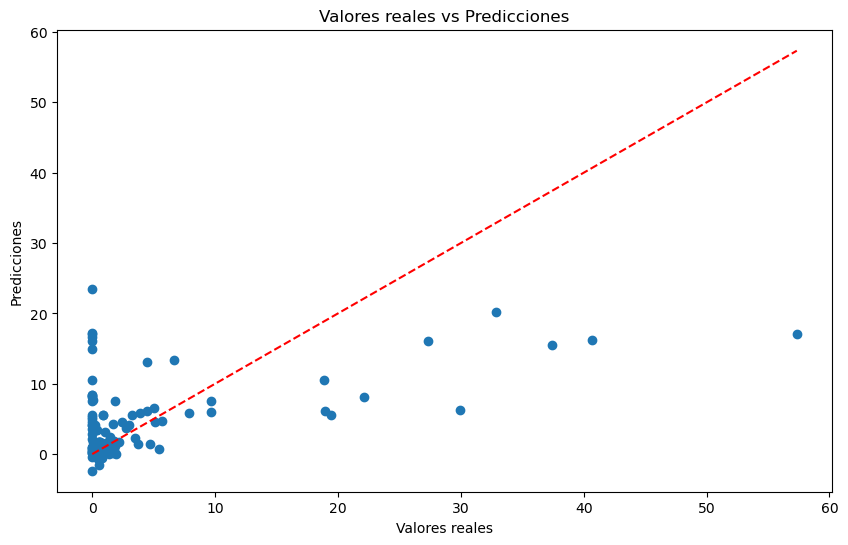

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


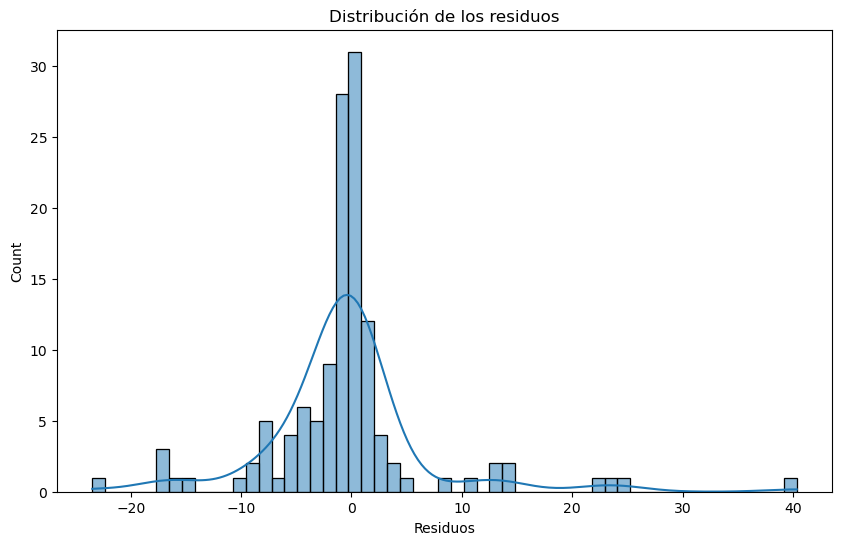

In [113]:
residuos = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los residuos')
plt.show()

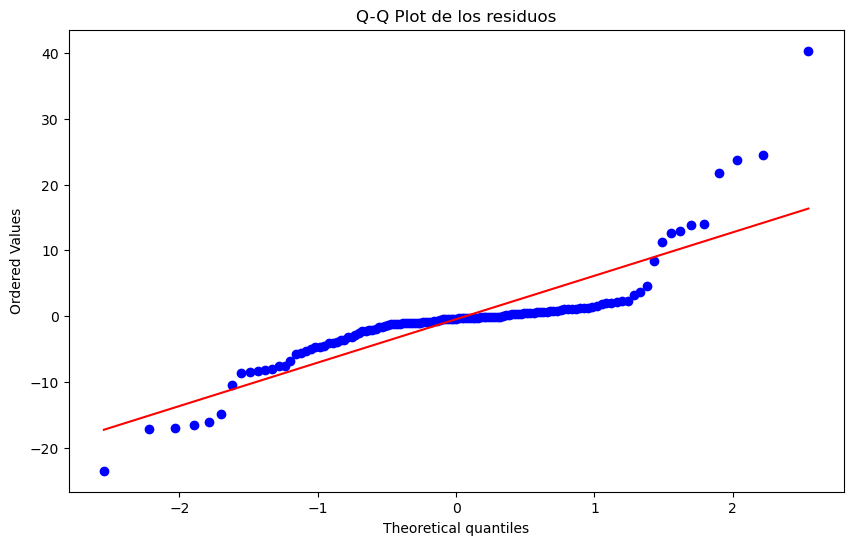

In [122]:
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de los residuos')
plt.show()